# Calculus

In this section, we will learn how to use SymPy to perform the basic calculus operations:

- Differentiation
- Integration
- Limits
- Series Expansion

In [1]:
from sympy import *
x, y, z = symbols('x y z')
init_printing()

## Differentiation

Derivatives are computed with the `diff` method or function (both the method and the function are the same). You must pass the variable(s) you wish to differentiate with respect to as arguments.

In [2]:
diff(sin(x), x)

In [3]:
sin(x).diff(x) # same

SymPy treats all variables as constants with respect to one another. If you don't specify a variable as a the variable you are differentiating wrt, that variable is treated as a constant.

In [4]:
expr = sin(x)*cos(y)
expr

In [5]:
expr.diff(x)

In [6]:
expr.diff(y)

To take multiple derivatives, pass multiple variables. You can take higher order derivatives with either `diff(expr, x, x, x)` or `diff(expr, x, 3)`.

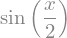

In [7]:
expr = sin(x/2)
expr

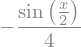

In [8]:
diff(expr, x, x) # Second derivative

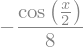

In [9]:
diff(expr, x, x, x) # Third derivative

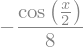

In [10]:
diff(expr, x, 3) # Also the third derivative

In [11]:
expr = exp(x)*y**2
expr

$\frac{\partial^2 f}{\partial x\partial y}$

In [12]:
diff(expr, x, y)

You can create unevaluated derivatives with `Derivative`.

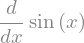

In [13]:
Derivative(sin(x), x)

You can evaluate it with `.doit()`.

In [14]:
Derivative(sin(x), x).doit()

An unevaluated derivative will be returned automatically if the derivative cannot be evaluated (e.g., for an undefined function). This is useful for ODEs.

`Function('f')` is the best way to create a variable that "depends" on another variable in the differentiation sense. Otherwise, SymPy treats variables as constant wrt each other

In [15]:
f = Function('f')

In [16]:
diff(y, x) # y is constant wrt x

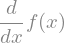

In [17]:
diff(f(x), x)

In general in section:

- A `lowercase` function evaluates.
- The corresponding `Capitalized` function does not evaluate.
- You can force the unevaluated variant to evaluate with `.doit()`.
- If SymPy cannot compute an answer, it will return an unevaluated result. 

### Exercises

Compute the following

$$ \frac{d}{dx}\sin(x)e^x$$
$$ \frac{\partial}{\partial x}\sin(xy)e^x $$
$$ \frac{\partial^2}{\partial x\partial y}\sin(xy)e^x $$


#### Advanced Exercise

Recall l'Hopital's rule, which states that if $$\lim_{x\to x_0}\frac{f(x)}{g(x)}$$ is $\frac{0}{0}$, $\frac{\infty}{\infty}$, or $-\frac{\infty}{\infty}$, then it is equal to $$\lim_{x\to x_0} \frac{f'(x)}{g'(x)}$$ (we will not consider other indeterminate forms here).  

Write a function that computes $\lim_{x\to x_0}\frac{f(x)}{g(x)}$. Use the `fraction` function to get the numerator and denominator of an expression, for example

In [18]:
fraction(x/y)

You may assume that the only indeterminate forms are the ones mentioned above, and that l'Hopital's rule will terminate after a finite number of steps. Do not use `limit` (use `subs`). Remember that after taking the derivatives, you will need to put the expression into the form $\frac{f(x)}{g(x)}$ before applying l'Hopital's rule again (what function did we learn that does this?).

In [19]:
def lhopital(expr, x, x0):
    """
    Computes limit(expr, x, x0) using l'Hopital's rule.

    >>> lhopital(sin(x)/x, x, 0)
    1
    >>> lhopital(exp(x)/x**2, x, oo)
    oo
    >>> lhopital((x**2 - 4*x + 4)/(2 - x), x, 2)
    0
    >>> lhopital(cos(x), x, 0)
    1
    >>> lhopital((x + sin(x))/x, x, 0)
    2
    """


In [20]:
lhopital(sin(x)/x, x, 0)

In [21]:
lhopital(exp(x)/x**2, x, oo)

In [22]:
lhopital((x**2 - 4*x + 4)/(2 - x), x, 2)

In [23]:
lhopital(cos(x), x, 0)

In [24]:
lhopital((x + sin(x))/x, x, 0)

## Integration

Symbolic integration is computed with `integrate()`. As with `diff`, you need to supply the variable to integrate with respect to. For example, computing $$\int \sin(x)\,dx$$

In [25]:
integrate(sin(x), x)

Integrate does not include the constant of integration, but be aware for indefinite integrals that it is still there. The answer may not match what you expect exactly due to this.

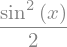

In [26]:
integrate(sin(x)*cos(x), x) # A textbook may say the answer is -cos(x)^2/2

A definite integral (with limits) is computed by passing a tuple `(variable, lower_limit, upper_limit)`. Multiple integrals can be computed by passing multiple variables. For example, to compute $$\int_0^\infty e^{-x}\,dx$$

In [27]:
integrate(exp(-x), (x, 0, oo)) # Remember that infinity is oo

As with `diff`, you can create unevaluated integrals with `Integrate` and evaluate them with `.doit()`. If `integrate` cannot compute an answer, it will return an unevaluated integral. SymPy has some sophisticated integration algorithms, but there will always be integrals that it cannot compute.

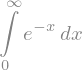

In [28]:
Integral(exp(-x), (x, 0, oo))

In [29]:
Integral(exp(-x), (x, 0, oo)).doit()

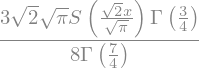

In [30]:
integrate(sin(x**2), x) # SymPy can compute some advanced integrals

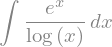

In [31]:
integrate(exp(x)/log(x), x) # SymPy cannot compute this, so the result is an unevaluated integral

### Exercises

In [32]:
def int_table(exprs, x):
    """
    Produces a nice integral table of the integrals of exprs

    >>> int_table([sin(x), cos(x), exp(x), log(x)], x)
    ⌠
    ⎮ sin(x) dx = C - cos(x)
    ⌡
    ⌠
    ⎮ cos(x) dx = C + sin(x)
    ⌡
    ⌠
    ⎮  x           x
    ⎮ ℯ  dx = C + ℯ
    ⌡
    ⌠
    ⎮ log(x) dx = C + x⋅log(x) - x
    ⌡
    """


In [33]:
int_table([sin(x), cos(x), exp(x), log(x)], x)

Now use your function to compute the integrals in this Mathematica ad.  Remember that the inverse trig functions are spelled like `asin` in SymPy. 

The ad below probably has a typo, because one of the integrals is trivial to compute. Include what you think the integral should be, and see if SymPy can compute that as well.

#### Advanced Exercise

Recall that the mean value of a function on an interval $[a, b]$ can be computed by the formula

$$\frac{1}{b - a}\int_{a}^{b} f{\left (x \right )} dx. % Why doesn't \, work? $$

Write a function that computes the mean value of an expression on a given interval.

In [34]:
def average_value(expr, x, a, b):
    """
    Computes the average value of expr with respect to x on [a, b].

    >>> average_value(sin(x), x, 0, pi)
    2/pi
    >>> average_value(x, x, 2, 4)
    3
    >>> average_value(x*y, x, 2, 4)
    3*y
    """


In [35]:
average_value(sin(x), x, 0, pi)

In [36]:
average_value(x, x, 2, 4)

In [37]:
average_value(x*y, x, 2, 4)

Write a function that takes a list of expressions and produces an "integral table", like

1. $$\int \sin(x)dx = -\cos(x) + C$$
2. $$\int \cos(x)dx = \sin(x) + C$$
3. $$\int e^xdx = e^x + C$$
4. $$\int \log(x)dx = x(\log(x) - 1) + C$$

## Limits

SymPy can compute limits with the `limit()` function. The syntax is

```python
limit(function, variable, point, dir='+')
```

Note that `dir` defaults to `+`, i.e., taking a limit from the right. To take a bidirectional limit, use `dir='+-'`.

For example, to compute $$\lim_{x\to 0}\frac{\sin(x)}{x}$$

In [38]:
limit(sin(x)/x, x, 0, dir='+-')


Some more examples:

$$\lim_{x\to0^+} \frac{1}{x}$$

In [39]:
limit(1/x, x, 0, dir='+')

$$\lim_{x\to0^-} \frac{1}{x}$$

In [40]:
limit(1/x, x, 0, dir='-')

The bidirectional limit is $\tilde{\infty}$ (`zoo`). This is complex infinity, i.e., the north pole of the Riemann sphere (remember that SymPy uses complex numbers by default everywhere).

In [41]:
limit(1/x, x, 0, dir='+-')

In [42]:
zoo

`limit` is often better than `subs` if the term you are substituting is an indeterminate form. For example,

In [43]:
expr = x**2/exp(x)
expr

At $x=\infty$, this expression is $\frac{\infty}{\infty}$, which `subs` cannot evaluate, so we get NaN:

In [44]:
expr.subs(x, oo)

`limit` gives the right answer.

In [45]:
limit(expr, x, oo) # Note that dir is automatically - for oo

### Exercise

Recall that the definition of the derivative of $f(x)$ at $x=x_0$ is $$f'(x_0) = \lim_{x\to x_0}\frac{f(x) - f(x_0)}{x - x_0}.$$  Write a function that computes the derivative using the limit definition, using `limit`.

In [46]:
def lim_deriv(expr, x, x0):
    """
    Computes the derivative of expr with respect to x at x0 using the limit definition.

    >>> lim_deriv(x**2, x, 0)
    0
    >>> lim_deriv(cos(x*y), x, pi)
    -y*sin(pi*y)
    
    Note that we must use this trick to take the derivative without evaluating at a point.
    >>> lim_deriv(exp(x**2), x, y).subs(y, x)
    2*x*exp(x**2)
    """


In [47]:
lim_deriv(x**2, x, 0)

In [48]:
lim_deriv(cos(x*y), x, pi)

The function you wrote above to compute limits using l'Hopital's rule is very fragile. And even if you try to make it sophisticated, it will still be unable to compute many limits.  Try it on the following limits, and see what happens. Then try computing the same limits with `limit`. 

1. $$\lim_{x\to 0}\frac{\log(x)}{x}$$
2. $$\lim_{x\to \infty}\frac{2^x}{3^x} \textbf{Warning: Be sure to save the notebook before you test this one, and be prepared to kill the kernel!}$$
3. $$\lim_{x\to \infty}x\sin{\left(\frac{1}{x}\right)}$$
4. $$\lim_{x\to 1}\arctan\left(\frac{1}{1 - x}\right)\; \text{Remember that $\arctan$ is called }\mathtt{atan}\text{ in SymPy}$$

The algorithm used by `limit()` is more sophisticated than l'Hopital's rule ([Gruntz's algorithm](https://docs.sympy.org/latest/modules/series/series.html#the-gruntz-algorithm)), and this is why.

In [49]:
lhopital(log(x)/x, x, 0)

In [50]:
limit(log(x)/x, x, 0)

In [51]:
lhopital(2**x/3**x, x, oo) XXX: Don't run. This hangs the notebook

SyntaxError: unterminated string literal (detected at line 1) (3235413439.py, line 1)

In [ ]:
limit(2**x/3**x, x, oo)

In [ ]:
lhopital(x**(1/x**2), x, 0)

In [ ]:
limit(x**(1/x**.5), x, 0)

In [ ]:
lhopital(x*sin(1/x), x, oo)

In [ ]:
limit(x*sin(1/x), x, oo)

In [ ]:
lhopital(atan(1/(1 - x)), x, 1)

In [ ]:
limit(atan(1/(1 - x)), x, 1)

## Series Expansion

SymPy can compute series expansions using the `series` method. It is called like

```
expr.series(x, x0, n)
```

where `x` is the variable to expand on, `x0` is the point to expand around (defaults to `0`), and `n` is the order of the expansion (defaults to `6`). 

For example:

In [ ]:
sin(x).series(x)

Next, note that `series` returns an order term, $O\left(x^6\right)$. This term will automatically absorb higher order terms.

In [ ]:
series = sin(x).series(x)
series

In [ ]:
series + x**7

However, in most cases, you will want to get rid of the order term. For example, if you try to substitute a value into the series, you will just get $O(1)$:

In [ ]:
series.subs(x, 0.1)

You can remove the order term with `.removeO()`:

In [ ]:
series.removeO()

In [ ]:
series.removeO().subs(x, 0.1)

In [ ]:
sin(0.1)

### Exercise

The Fibonicci sequence is rexcursively defined by 

$$F_0 = 0,$$
$$F_1 = 1,$$
$$F_n = F_{n - 1} + F_{n - 2}.$$

The first few vales are 0, 1, 1, 2, 3, 5, 8, 13, 21, …

The Fibonicci sequence has a generating function given by $$s(x) = \frac{x}{1 - x - x^2}$$ (see http://en.wikipedia.org/wiki/Fibonacci_number#Power_series for a derivation). What this means is that if we expand $s(x)$ as a power series, the coefficients are the Fibonicci numbers, $$s(x) = \sum_{n=0}^\infty F_nx^n$$

Write a function that uses series to compute the nth Fibonicci number. 

Hint: `expr.coeff(x, n)` will give the coefficient of $x^n$ in an expression. For example

In [ ]:
(1 + 2*x - x**2).coeff(x, 0)

In [52]:
(1 + 2*x - x**2).coeff(x, 1)

In [53]:
(1 + 2*x - x**2).coeff(x, 2)

In [54]:
def fib(n):
    """
    Uses series expansion and a generating function to compute the nth Fibonnicci number.

    >>> fib(0)
    0
    >>> fib(4)
    3
    >>> fib(9)
    34
    """


In [55]:
fib(0)

In [56]:
fib(4)

In [57]:
fib(9)

Note: if you really want to compute Fibonicci numbers, there is a function in SymPy called `fibonicci` that can do this far more efficiently.

In [58]:
[fibonacci(i) for i in range(10)]

### lseries

Note that `n=6` (the default) is the *order* of the series, *not* the number of terms. If you specifically want a given number of terms, you can use `lseries`, which returns a generator:

In [59]:
sin(x).lseries(x)

<generator object Expr.series.<locals>.<genexpr> at 0x111bbc7c0>

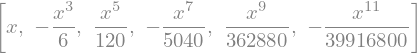

In [60]:
[next(_) for i in range(6)]

#### Exercise

Write a function that computes the number of terms of a series expansion of a given function are needed to compute the given value near the given point within the given accuracy. For example, in the expansion of cos(x) near $\pi$, suppode we wish to compute $\pi + 1$. Let us see if terms up to $O(x^6)$ are sufficient.

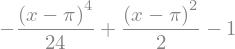

In [61]:
series = cos(x).series(x, pi, 5).removeO()
series

In [62]:
a = series.evalf(subs={x: pi + 1})
a

In [63]:
b = cos(pi + 1).evalf() # Exact value
b

So the expansion is accurate up to two places after the decimal point, i.e., within `0.01`. 

In [64]:
abs(a - b) < 0.01

Hint: to get the exponent from a term like `3*(x - 1)**5`, use `as_coeff_exponent`. 

In [65]:
(3*(x - 1)**5).as_coeff_exponent(x - 1)

In [66]:
def series_accuracy(func, expansion_point, evaluation_point, accuracy, x):
    """
    Returns n such that series terms up to and including (x - expansion_point)**n 
    (i.e., O((x - expansion_point)**(n + 1)) are needed to compute func at 
    evaluation_point within the given accuracy.

    >>> series_accuracy(cos(x), pi, pi + 1, 0.01, x)
    4
    >>> series_accuracy(exp(x), 1, 10, 1, x)
    23
    """


In [67]:
series_accuracy(cos(x), pi, pi + 1, 0.01, x)

In [68]:
series_accuracy(exp(x), 1, 10, 1, x)